In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
import tensorflow as tf
import scipy as sp
from scikeras.wrappers import KerasRegressor
import sklearn.metrics
from sklearn.metrics import mean_absolute_error 

In [2]:
def plot_figure(elevation_array, observation_array, title):
    print(f"Length of time window: {len(elevation_array)}")
    
    fig, axes = plt.subplots(2,1,figsize=[30,10], dpi=300, sharex=True)
    fig.suptitle(title, fontsize=35)
    plt.rcParams.update({'font.size': 30})
    
    t_array_model = np.asarray((1/1.28) * np.arange(0,len(elevation_array)))
    t_array_observations = np.asarray((1/1.28) * np.arange(0,len(observation_array)))

    axes[0].plot(t_array_model,elevation_array, color='r', linewidth=2)
    axes[0].plot(t_array_model,elevation_array.mean()*np.ones(np.arange(0,len(elevation_array),1).shape[0]), color='k', linestyle='-.', linewidth=2)
    axes[0].grid('on')
    axes[0].set_ylim([-2.5,2.5])
    axes[0].set_title("Model predictions")
    axes[1].plot(t_array_observations,observation_array, color='b', linewidth=2)
    axes[1].grid('on')
    axes[1].set_xlabel("Time(in seconds)")
    axes[1].set_title("Observations from the CDIP buoy")

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.88, 
                        wspace=0.4, 
                        hspace=0.4)    
    plt.savefig(title+".png")

def plot_windows(elevation_array, observation_array, error_window, title):
    print(f"Length of time window: {len(error_window)}")
    
    if error_window == corr_window:
        error = max(error_window)
    else:
        error = min(error_window)  
    error_index = error_window.index(error)
    print(error_index)
    
    fig, axes = plt.subplots(2,1,figsize=[30,10], dpi=300, sharex=True)
    fig.suptitle(title, fontsize=35)
    plt.rcParams.update({'font.size': 30})
    
    t_array_model = np.asarray((1/1.28) * np.arange(0,len(elevation_array)))
    t_array_observations = np.asarray((1/1.28) * np.arange(0,len(observation_array)))

    axes[0].plot(t_array_model[0:len_observations],elevation_array[error_index:len_observations+error_index], color='r', linewidth=2)   
    axes[0].set_ylim([-2.5,2.5])
    axes[0].grid('on')
    axes[0].set_title("Model predictions")
    axes[1].plot(t_array_observations,observation_array, color='b', linewidth=2)
    axes[1].grid('on')
    axes[1].set_xlabel("Time(in seconds)")
    axes[1].set_title("Observations from the CDIP buoy")

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.88, 
                        wspace=0.4, 
                        hspace=0.4)    
    plt.savefig(title+".png")

Length of time window: 538
Length of time window: 155
128
Length of time window: 155
88
Length of time window: 155
128
128


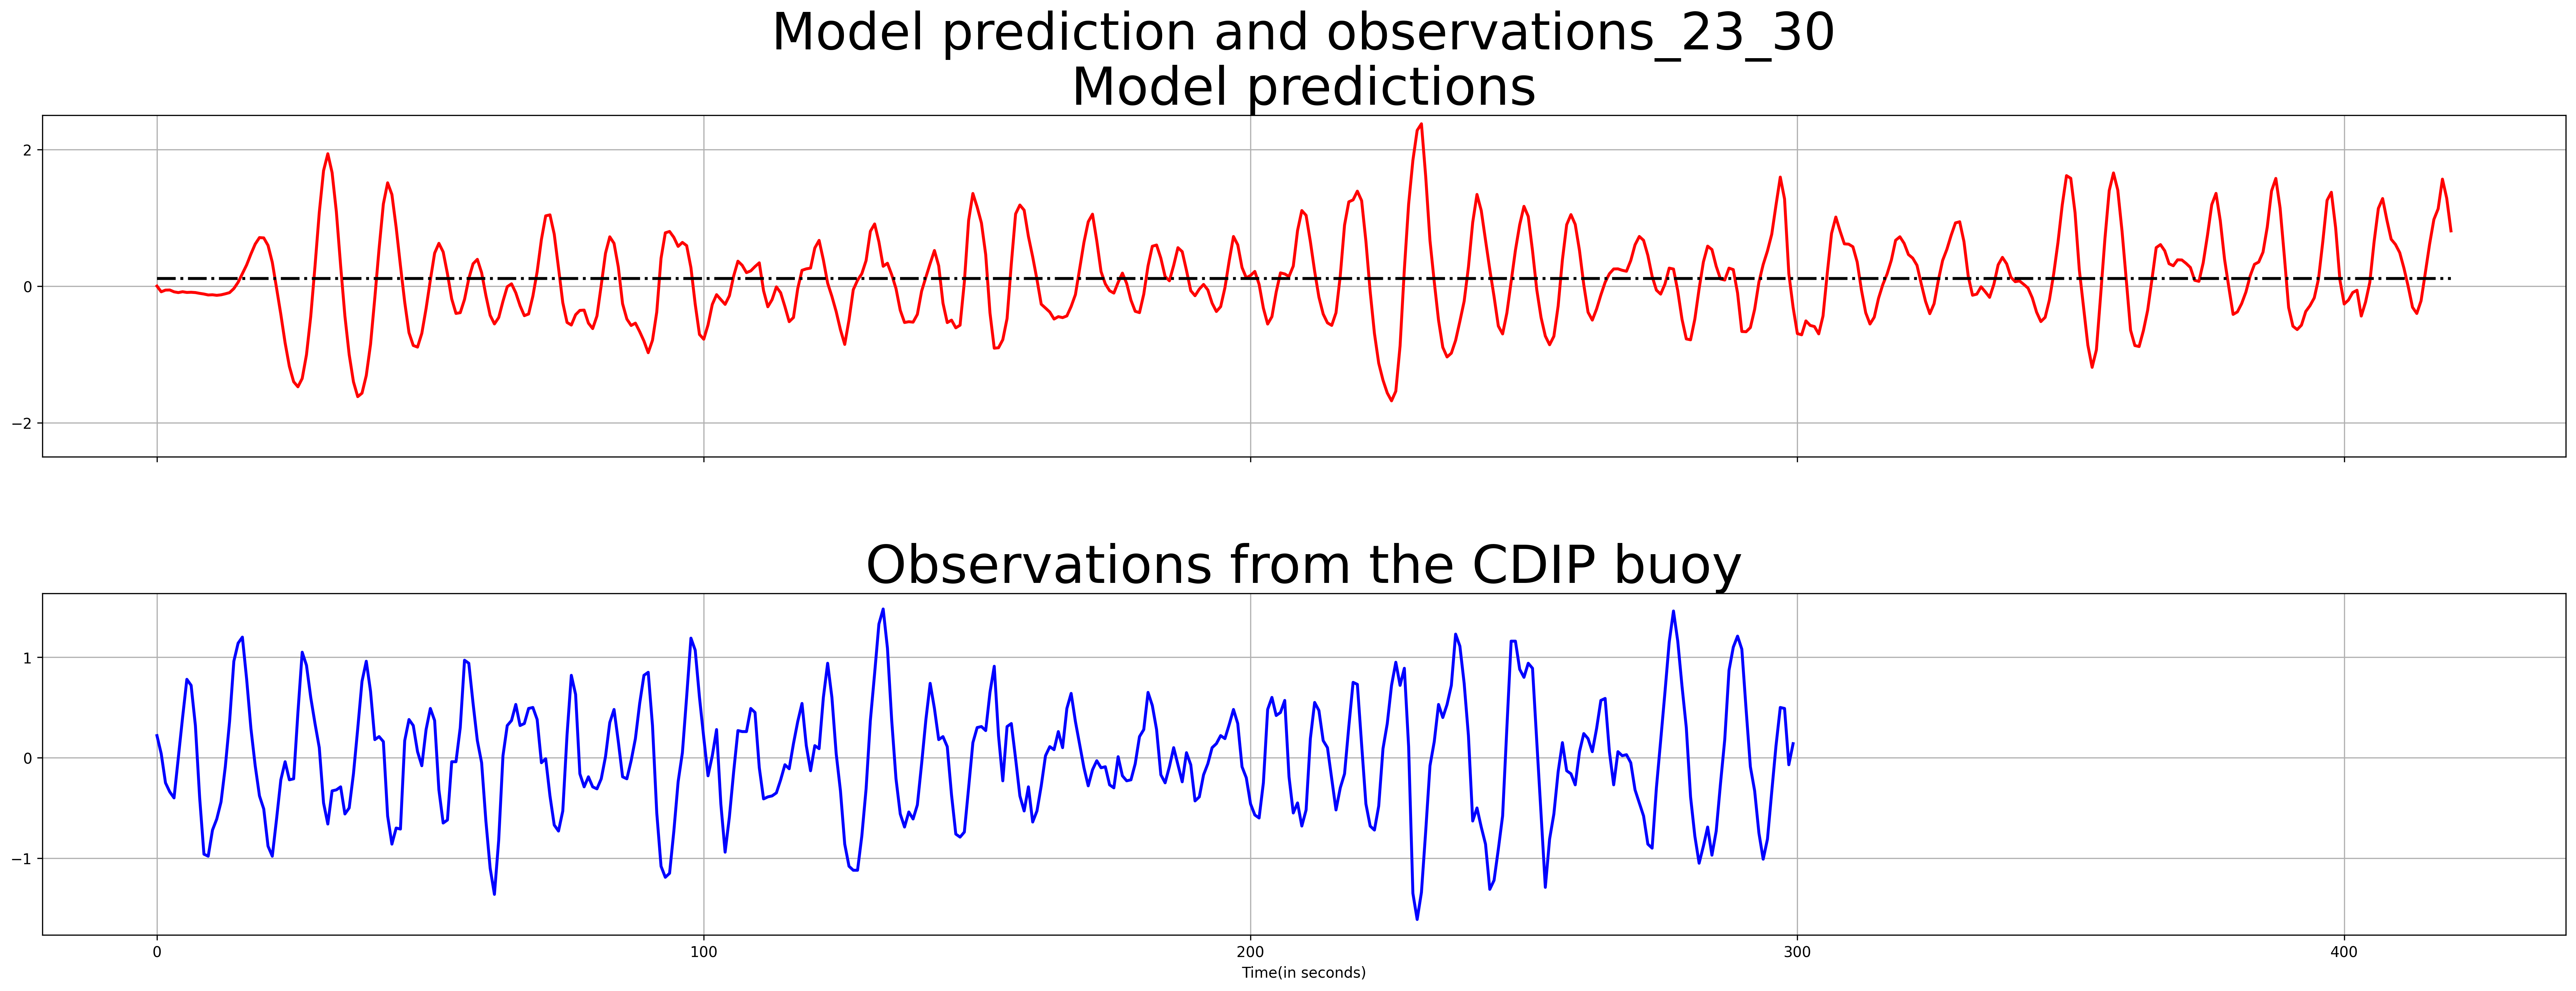

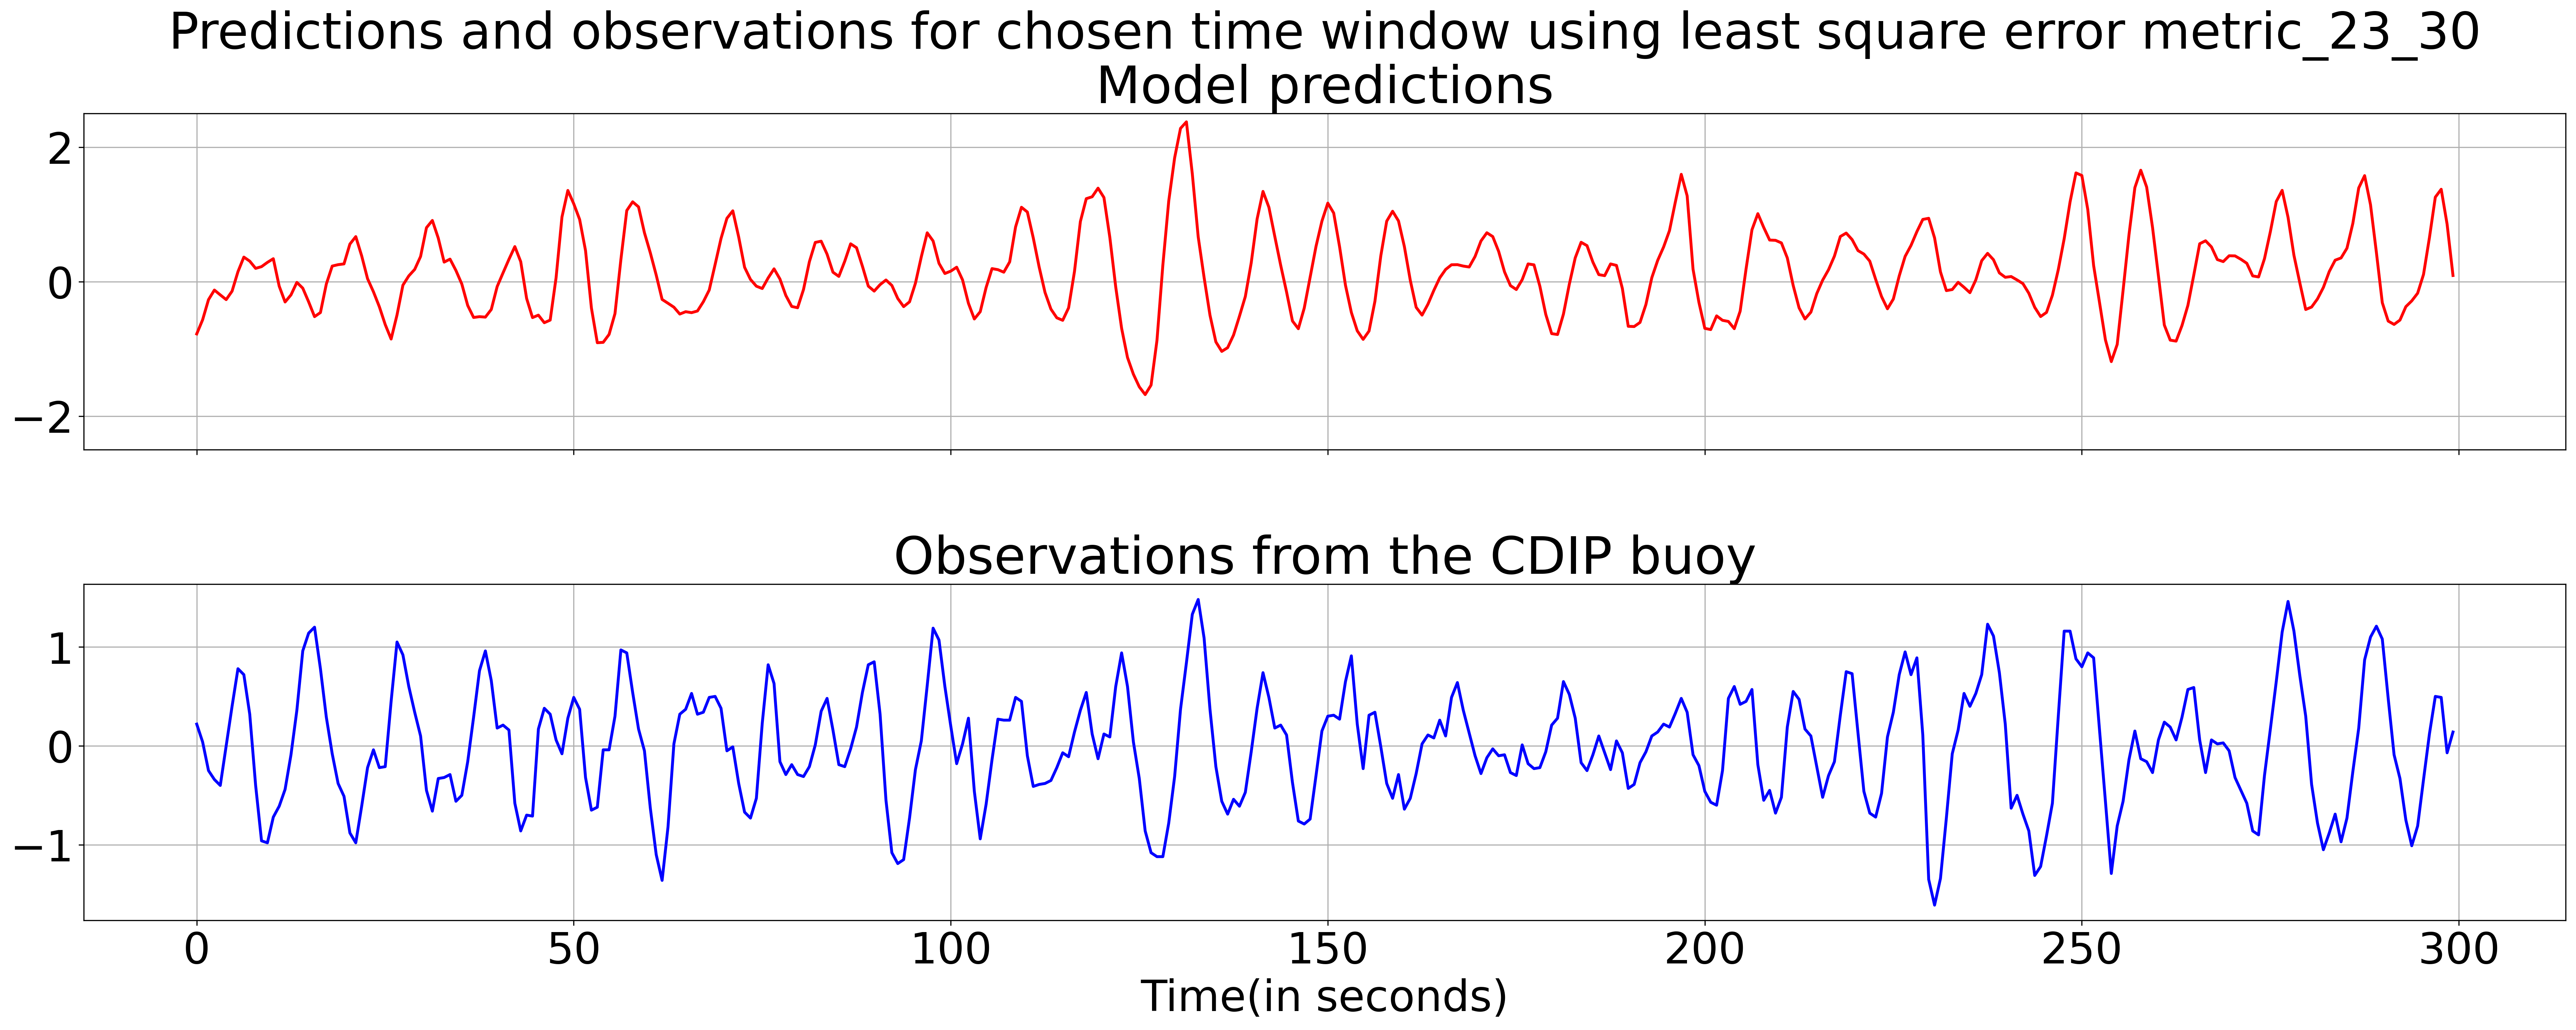

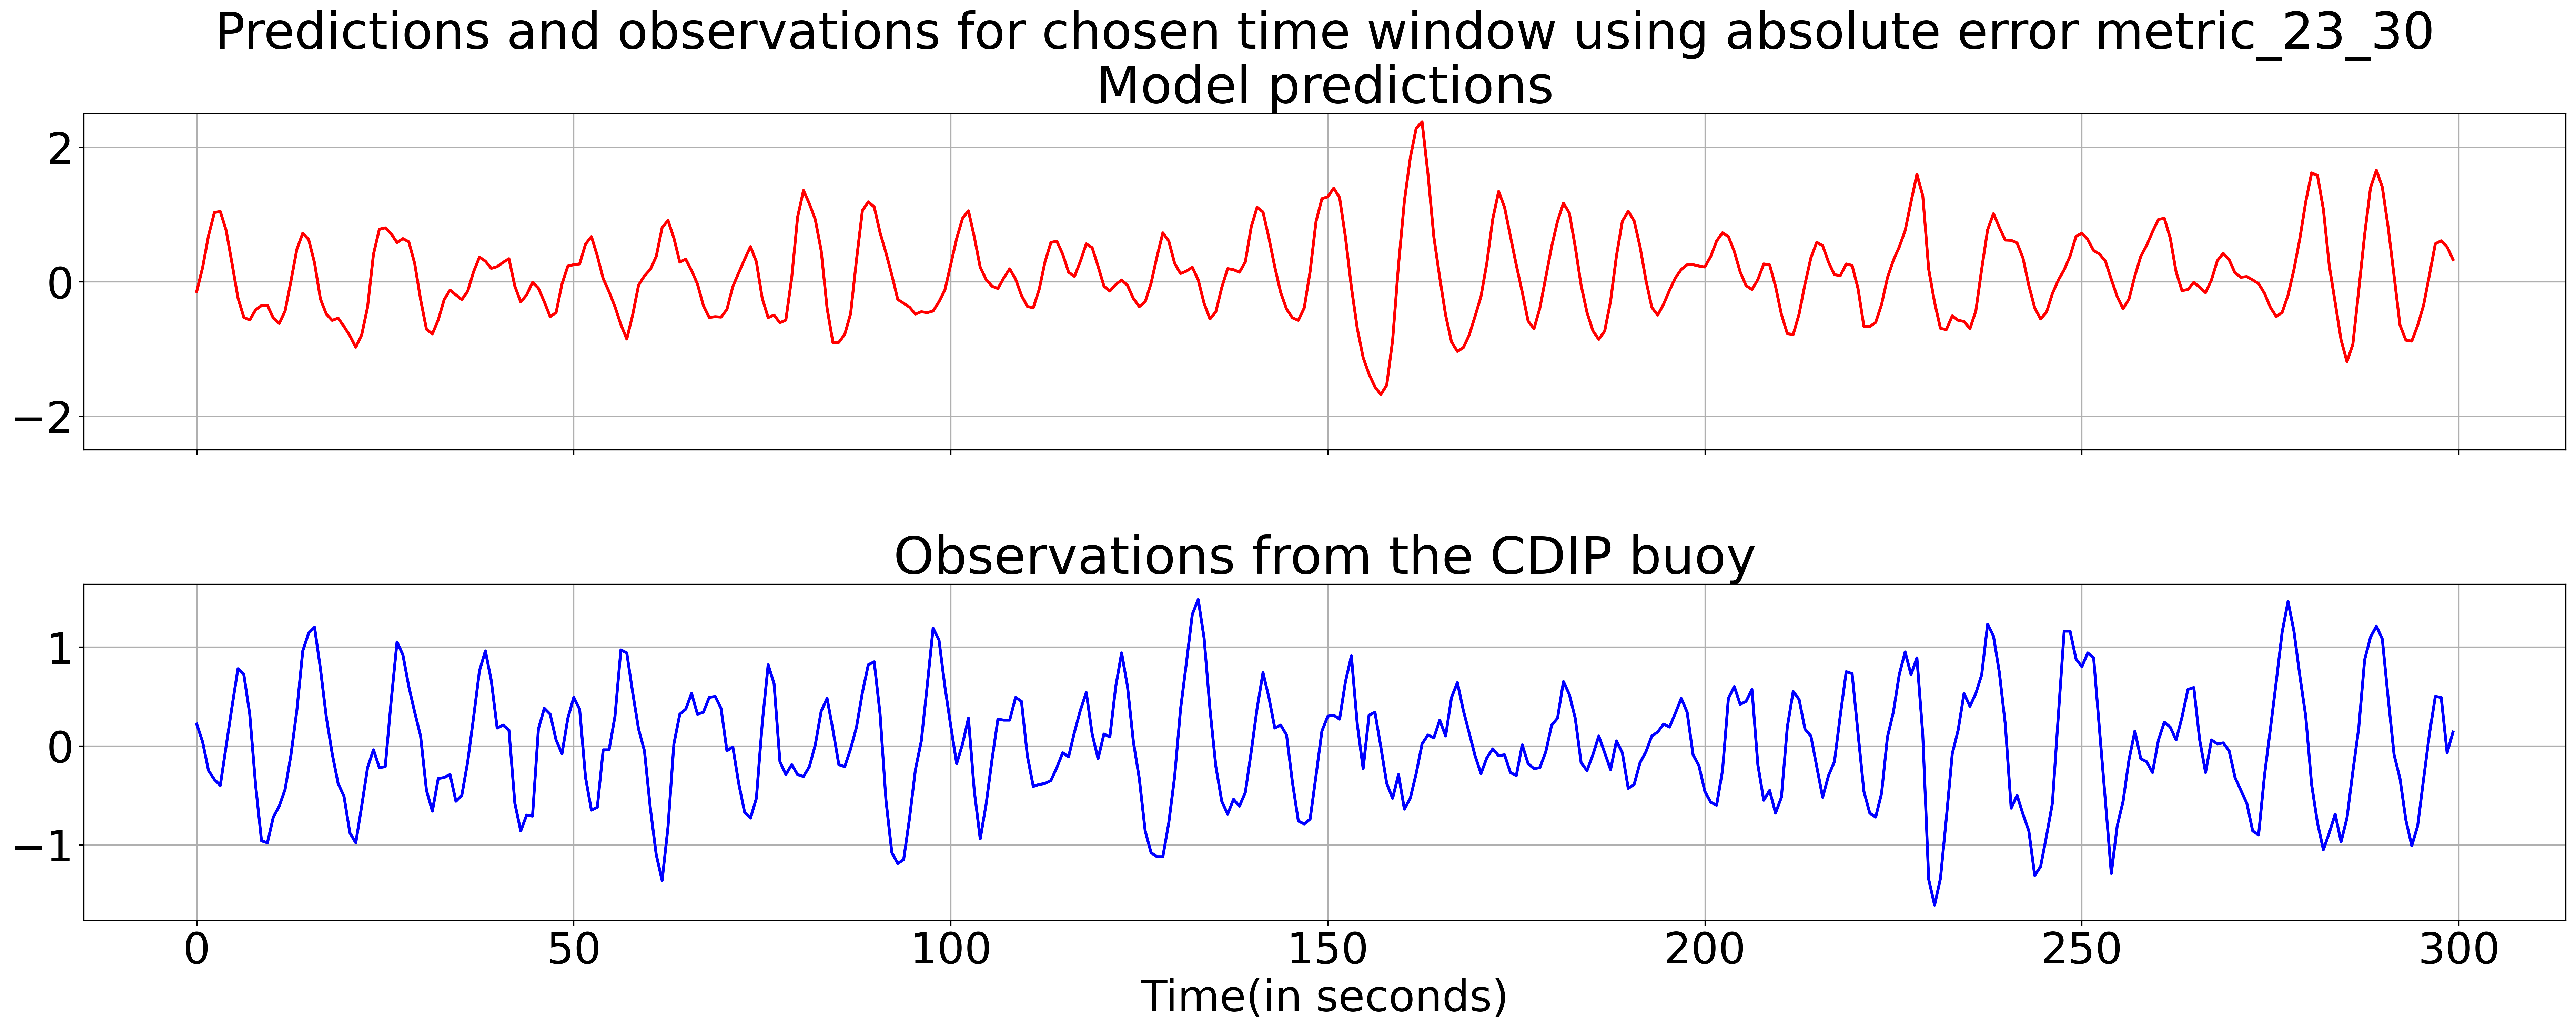

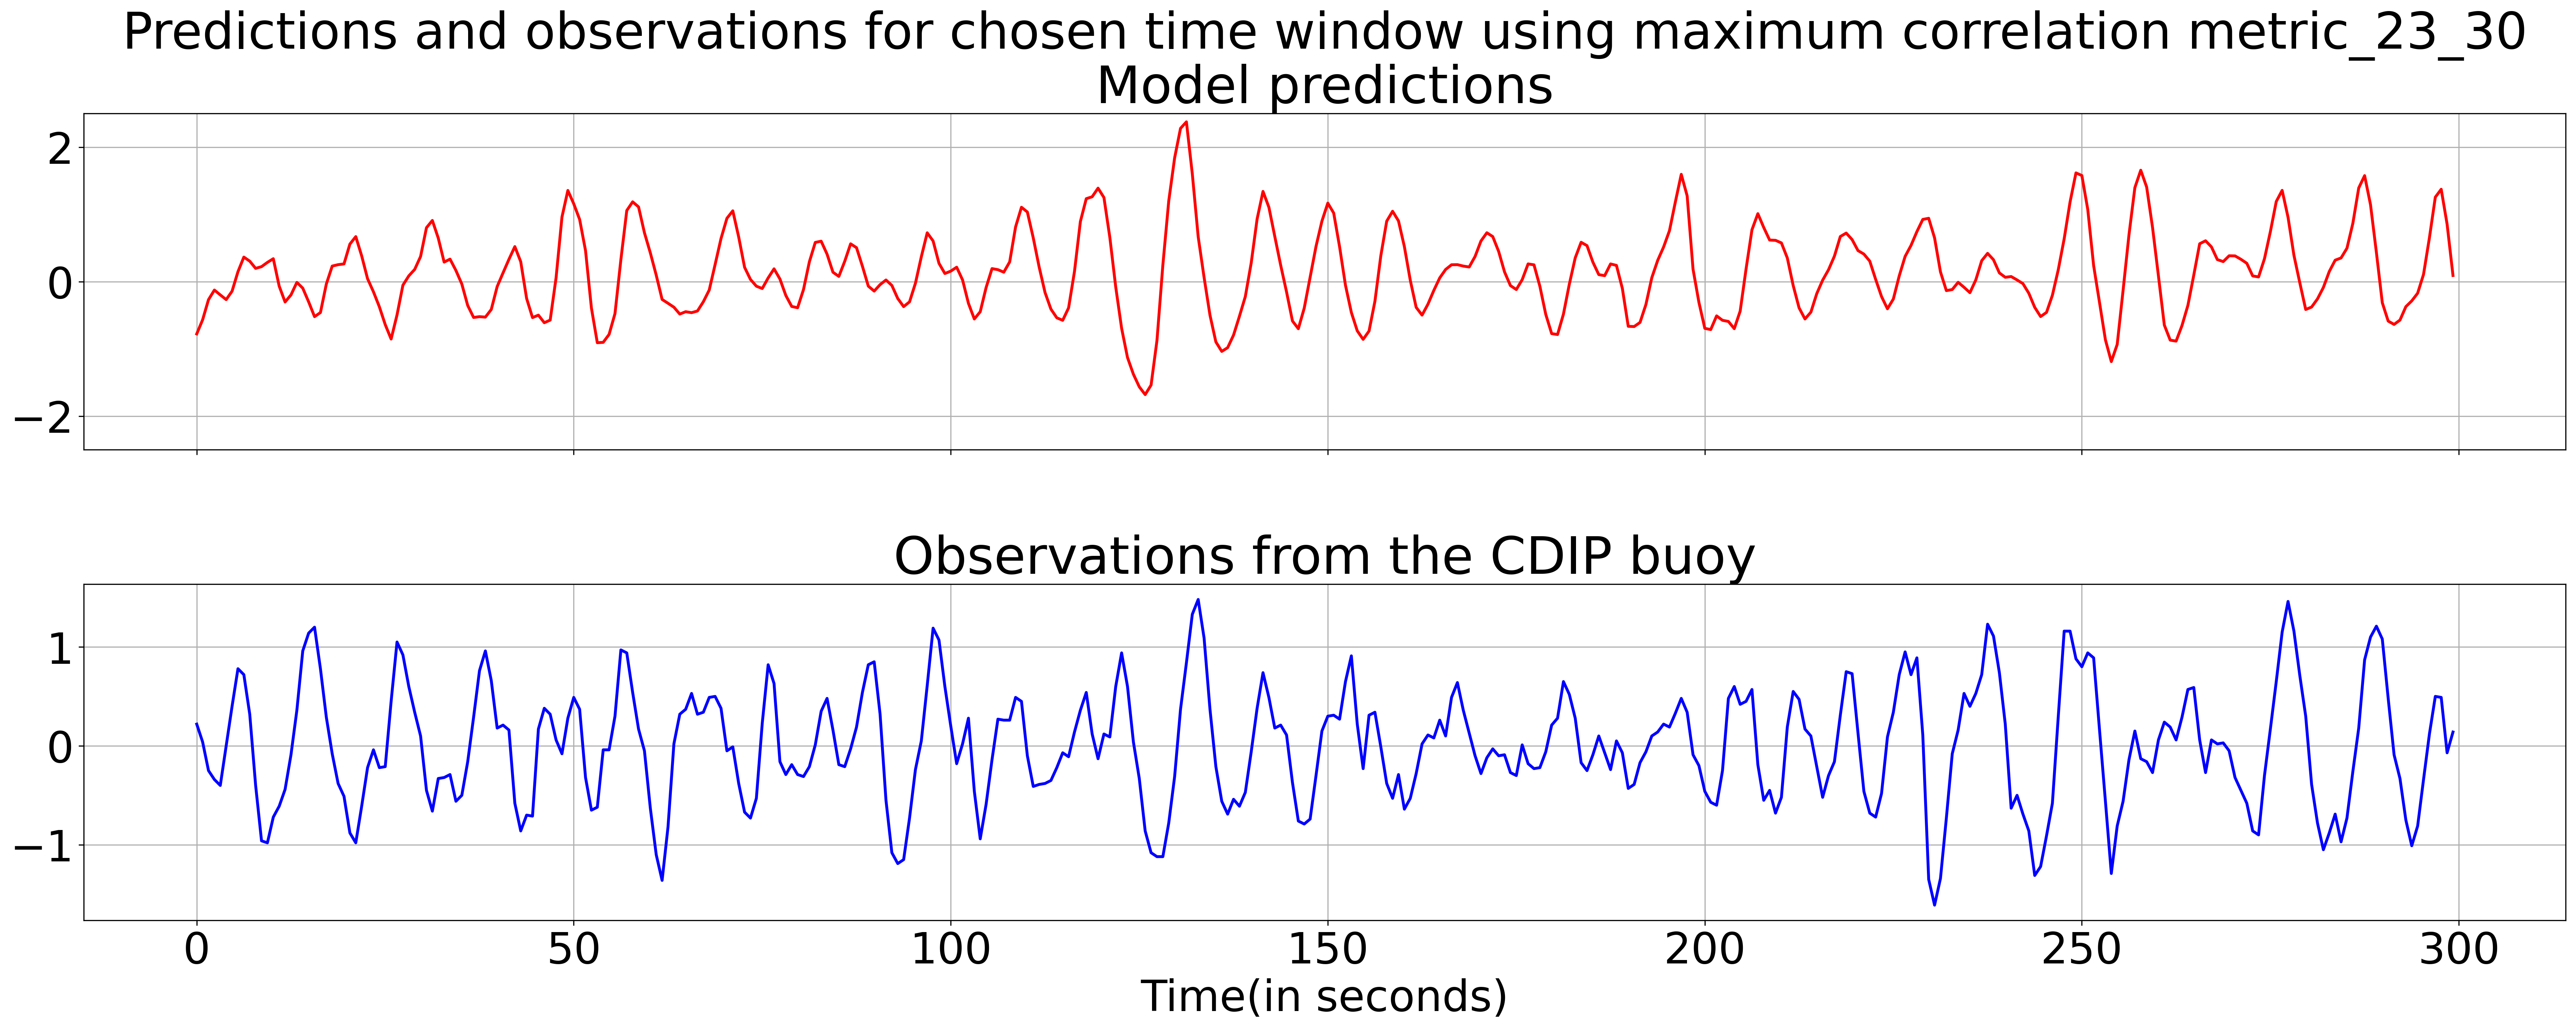

In [3]:
slow_vars = pd.read_csv("SlowVaryingAmplitudes_23_30.csv", header = None)
observations = pd.read_csv('z_disp_23_30.txt', header = None)
elevation = np.transpose(np.asarray(pd.read_csv('Model_prediction_23_30.csv', header = None)))

plot_figure(elevation, observations, "Model prediction and observations_23_30")

mse_error_window = []
mae_error_window = []
corr_window = []
len_preds = len(elevation)
len_observations = len(observations)
for i in range(len_preds - len_observations + 1):
    obs = observations
    preds = elevation[i:len_observations+i]
    mse_error = mean_squared_error(np.array(obs).reshape(len_observations),np.array(preds).reshape(len_observations))
    mae_error = mean_absolute_error(np.array(obs).reshape(len_observations),np.array(preds).reshape(len_observations))
    corr = np.corrcoef(np.array(obs).reshape(len_observations),np.array(preds).reshape(len_observations))
    corr_score = corr[0,1]
    mse_error_window.append(mse_error)
    mae_error_window.append(mae_error)
    corr_window.append(corr_score)
    
plot_windows(elevation, observations, mse_error_window, \
             "Predictions and observations for chosen time window using least square error metric_23_30")
plot_windows(elevation, observations, mae_error_window, \
             "Predictions and observations for chosen time window using absolute error metric_23_30")
plot_windows(elevation, observations, corr_window, \
             "Predictions and observations for chosen time window using maximum correlation metric_23_30")

slow_var_arrays = np.asarray(slow_vars)
error_window = mse_error_window
if error_window == corr_window:
    error = max(error_window)
else:
    error = min(error_window)  
error_index = error_window.index(error)
print(error_index)
slow_var_window = slow_var_arrays[:,error_index:len_observations+error_index]

fig, axes = plt.subplots(11,3, figsize=[35,25], dpi=300, sharex = True)
fig.suptitle("Slow varying amplitudes", fontsize=40)
plt.rcParams.update({'font.size': 30})
for i in range(len(slow_var_window)):
    j = i//3
    k = i%3
    axes[j,k].plot(slow_var_window[i,:], color='r', linewidth=2)
    axes[j,k].set_title(f'a{i}')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.88, 
                    wspace=0.4, 
                    hspace=0.4)    
plt.savefig("Slow_varying_amplitudes_23_30.png")

X_req_23_30 = np.transpose(slow_var_window)
Y_req_23_30 = np.asarray(observations)

In [4]:
X_req = X_req_23_30
Y_req = Y_req_23_30

np.savetxt("model_data_X.csv", X_req, delimiter=",")
np.savetxt("observation_data_Y.csv", Y_req, delimiter=",")

print(X_req.shape)
print(Y_req.shape)

(384, 33)
(384, 1)


In [5]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X_req, Y_req, random_state=0, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, random_state=0, test_size=0.3)

x_tv_scaler = MinMaxScaler(feature_range=(-1,1))
x_tv_scaler.fit(x_train_val)
x_tv_scaled = x_tv_scaler.transform(x_train_val)
x_test_scaled = x_tv_scaler.transform(x_test)

y_tv_scaler = MinMaxScaler(feature_range=(-1,1))
y_tv_scaler.fit(y_train_val)
y_tv_scaled = y_tv_scaler.transform(y_train_val)

In [6]:
def create_model(hidden_layer_sizes=(50, 50), optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], input_dim=X_req.shape[1], activation='relu'))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [7]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [8]:
best_model = create_model(hidden_layer_sizes=(400,600,800), optimizer='adam')

C:\Users\samar\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
best_model.fit(x_tv_scaled, y_tv_scaled, epochs=1000, batch_size=64, verbose=10)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [10]:
import os
file_str = '23_30'
file_save_name = file_save_name = os.getcwd() + "/mapping_"  + "/best_MLP_" + file_str + "_checkpoint.model.keras"

In [11]:
best_model.save(file_save_name)

In [12]:
model = keras.models.load_model(file_save_name)
y_pred_scaled = model.predict(x_test_scaled)

y_pred = y_tv_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
y_test = y_test.ravel()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


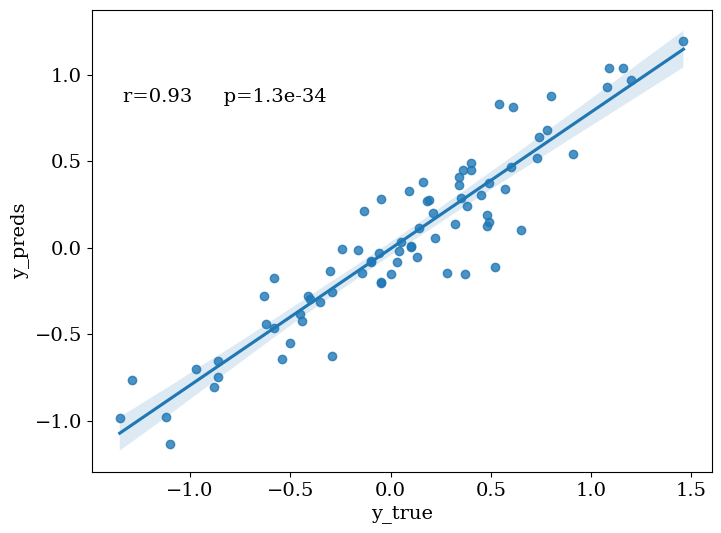

In [14]:
df = pd.DataFrame({'y_true': y_test, 
              'y_preds' : y_pred})
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
time=23_30
plt.figure(figsize=[8,6])
sns.regplot(data=df, x='y_true',y='y_preds')
ax = plt.gca()
r,p = sp.stats.pearsonr(df['y_true'], df['y_preds'])
ax.text(0.05, 0.8, 'r={:.2f}     p={:.2g}'.format(r,p), transform=ax.transAxes)
plt.savefig(f'Model_MLP_mapping_best_score.png')